<a href="https://colab.research.google.com/github/SalmaAulia29/Praktikum-AI-Workflow/blob/main/P1_Data_penjualan_Latihan_2306138_PRKKCB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

#buat data penjualan toko
data = {
    "tanggal": ["2025-03-04","2025-03-04","2025-03-04","2025-03-05","2025-03-05","2025-03-05","2025-03-06","2025-03-06","2025-03-06","2025-03-07"],
    "Produk" : ["Busi","Oli","Lampu","Carbu Cleaner","Boring","Klep","Shockbreaker","vanbelt","ROller","PerCVT"],
    "Jumlah Terjual" : [10,4,3,15,2,8,3,5,6,18],
    "Stok" : [20,15,10,30,10,15,13,18,20,40],
    "Harga Satuan" : [15000,50000,10000,35000,100000,90000,150000,60000,45000,70000],

}

# Simpan dalam DataFrame
df = pd.DataFrame(data)

# Simpan sebagai file csv
df.to_csv("data_penjualan_Latihan.csv", index=False)

print("File CSV berhasil dibuat dan disimpan sebaai 'data_penjualan_Latihan.csv'!")

File CSV berhasil dibuat dan disimpan sebaai 'data_penjualan_Latihan.csv'!


In [ ]:
# membaca file CSV
df = pd.read_csv("data_penjualan_Latihan.csv")

# menampilkan 5 data kolom utama penjualanSparepart
print(df.head())

      tanggal         Produk  Jumlah Terjual  Stok  Harga Satuan
0  2025-03-04           Busi              10    20         15000
1  2025-03-04            Oli               4    15         50000
2  2025-03-04          Lampu               3    10         10000
3  2025-03-05  Carbu Cleaner              15    30         35000
4  2025-03-05         Boring               2    10        100000


In [ ]:
# Cek apakah ada data yang kosong
print(df.isnull().sum())

# Konversi Kolom "tanggal" ke  format datetime
df["tanggal"] = pd.to_datetime(df["tanggal"])

# Tambhakan kolom"Total Penjualan"
df["Total Penjualan"] = df["Jumlah Terjual"] * df["Harga Satuan"]

# tambahkan Kolom "Keuntungan" (asumsi modal 10.000 per produk)
df["Keuntungan"] = df["Total Penjualan"] -(df["Jumlah Terjual"] * 10000)

# Menampilkan hasil transformasi
print(df.head())

tanggal           0
Produk            0
Jumlah Terjual    0
Stok              0
Harga Satuan      0
dtype: int64
     tanggal         Produk  Jumlah Terjual  Stok  Harga Satuan  \
0 2025-03-04           Busi              10    20         15000   
1 2025-03-04            Oli               4    15         50000   
2 2025-03-04          Lampu               3    10         10000   
3 2025-03-05  Carbu Cleaner              15    30         35000   
4 2025-03-05         Boring               2    10        100000   

   Total Penjualan  Keuntungan  
0           150000       50000  
1           200000      160000  
2            30000           0  
3           525000      375000  
4           200000      180000  


In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# pilih fitur (x) dan target (y)
x= df[["Jumlah Terjual","Stok"]]
y= (df["Stok"] < 5).astype(int) # 1 jika stok kurang dari 5, 0 jika cukup

#split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# buat model Decision tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluasi Model
y_pred = model.predict(X_test)
print("Akurasi Model:", accuracy_score(y_test, y_pred))

Akurasi Model: 1.0


In [ ]:
produk_baru = [[8,3]]
prediksi = model.predict(produk_baru)

if prediksi[0] == 1:
  print("Stok Masih Cukup")
else:
  print("produk perlu di-restock")

produk perlu di-restock


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


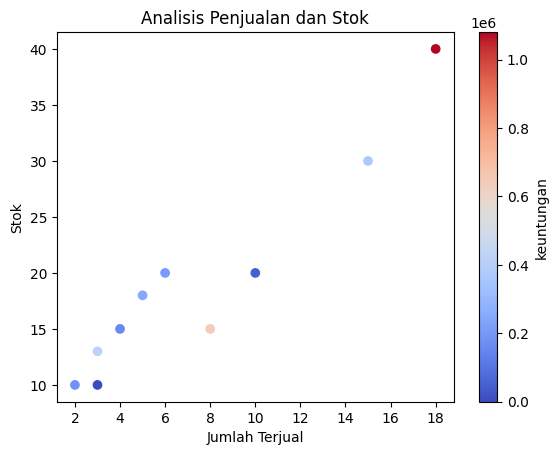

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df["Jumlah Terjual"], df["Stok"], c=df["Keuntungan"], cmap="coolwarm")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Stok")
plt.title("Analisis Penjualan dan Stok")
plt.colorbar(label="keuntungan")
plt.show()